In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Dataset = pd.read_csv(r"F:\study\HK1_3_2425\DS321_MachineLearning1\resources\Adv.csv",header = None )
X=Dataset.drop(columns=Dataset.shape[1]-1)
y = Dataset.iloc[:,Dataset.shape[1]-1]
#one = np.ones((X.shape(0),1))
#X=np.concentate((one,X),axis=1)
X=pd.concat([pd.Series(1,index=X.index,name="Dung"),X],axis=1)
#X=np.hstack((np.ones((X.shape[0],1)),X))
N,d=X.shape
theta = np.array([0.1]*d)#Output: array([0, 0, 0])

for i in range(0, d-1):
    X[i] = X[i]/np.max(X[i])
def multi_theta_X(theta, X):
    return theta*X

def cost_function(X, y, theta):
    y1 = multi_theta_X(theta, X)
    y1=np.sum(y1, axis=1)
    return sum((y1-y)**2)/(2*N)

def train(X, y, theta, learning_rate, iters):
    cost_history = []  #cost function in each iterations
    for k in range(iters):
        y1 = multi_theta_X(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, d):
            theta[c] = theta[c] - learning_rate*(sum((y1-y)*X.iloc[:,c])/N)
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return cost_history, cost, theta

<Figure size 640x480 with 0 Axes>

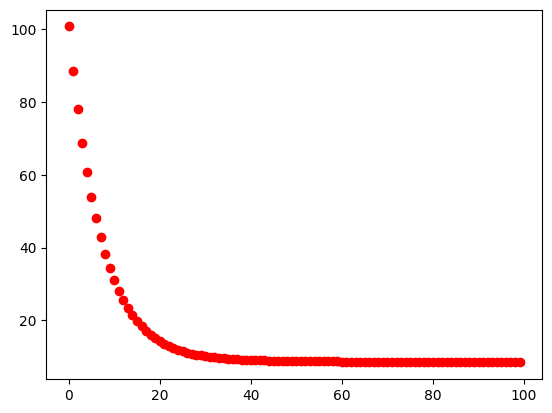

In [3]:
iters=100
cost_history, cost, theta = train(X, y, theta, 0.05, iters)
y_hat = multi_theta_X(theta, X)
y_hat = np.sum(y_hat, axis=1)
plt.figure()
#plt.scatter(x=list(range(0, N)),y= y, color='red')
#plt.scatter(x=list(range(0, N)), y=y_hat, color='black')
#plt.show()
plt.figure()
plt.scatter(x=list(range(0, iters)), y=cost_history,color='red')
plt.show()